# Time Series Decomposition

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read AirPassengers data

In [4]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.columns = ['Month','nPass']
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Convert month column to datetime

In [7]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,nPass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.dtypes

Month    datetime64[ns]
nPass             int64
dtype: object

In [9]:
df.index = df['Month']

In [10]:
df

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


### Drop Month columns

In [11]:
df = df.drop(columns=['Month'])
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualize the time series data

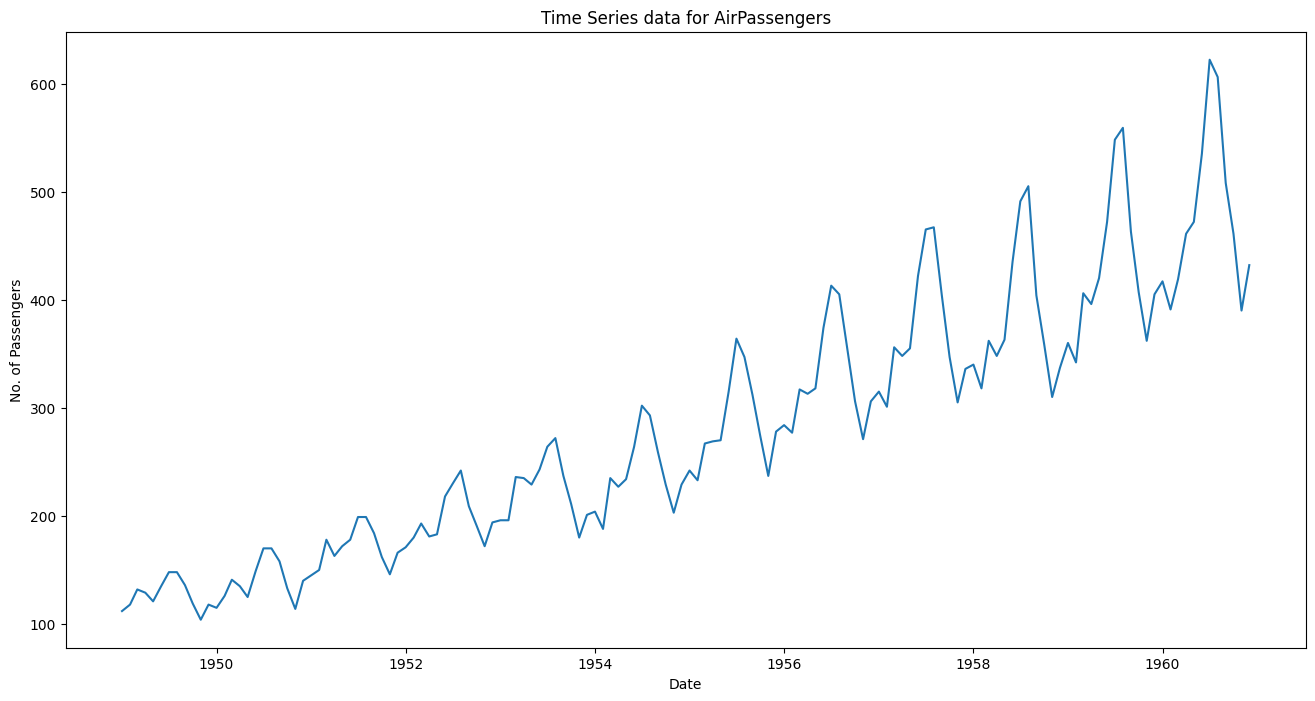

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.title('Time Series data for AirPassengers')
plt.xlabel('Date')
plt.ylabel('No. of Passengers')
plt.show()

### Time Series decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
T = seasonal_decompose(df['nPass'], model='multiplicative')

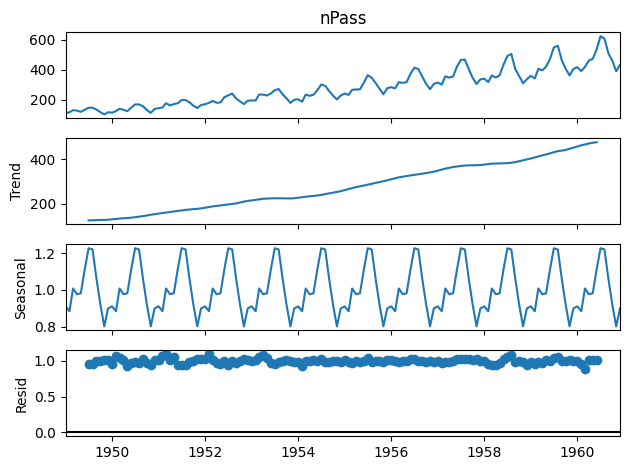

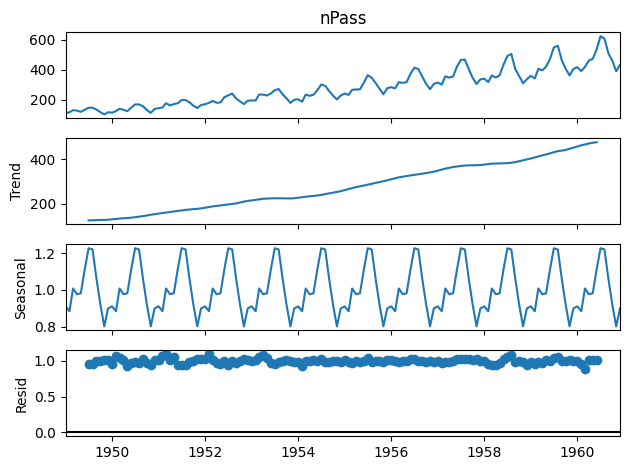

In [15]:
T.plot()

<Axes: xlabel='Month'>

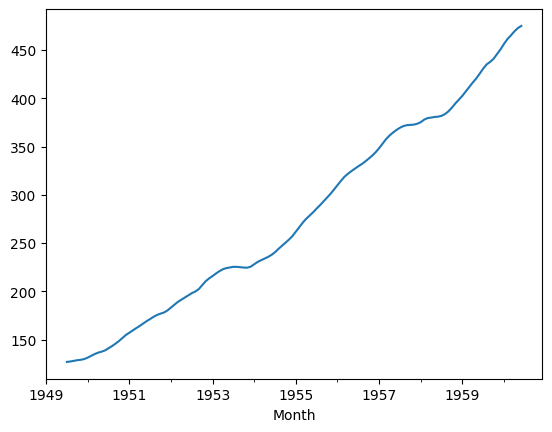

In [16]:
T.trend.plot()

<Axes: xlabel='Month'>

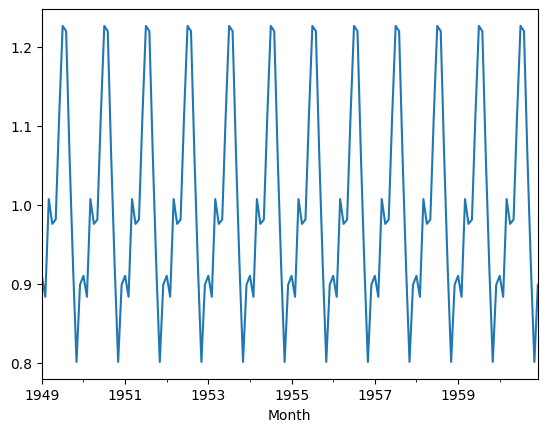

In [17]:
T.seasonal.plot()

<Axes: xlabel='Month'>

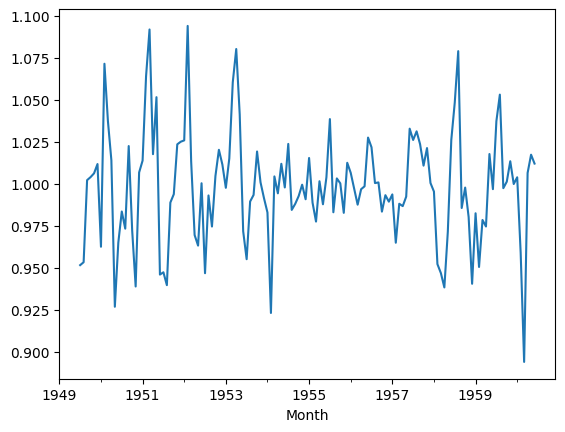

In [18]:
T.resid.plot()

### Time Series forecasting

### Install pmdarima library

In [19]:
%pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------- --------------------- 245.8/566.2 kB 7.4 MB/s eta 0:00:01
     ------------------------------------  563.2/566.2 kB 11.8 MB/s eta 0:00:01
     ------------------------------------  563.2/566.2 kB 11.8 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 5.1 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/39/5d/5ae976df4e368327864917a24f9dee7c8176de1b5b7044ee9903b8adb07a/Cython-3.0.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.8 MB 14.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.8 MB 14.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.4/2.8 MB 12.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 12.7 MB/s eta 0:00:0

### Restart and run all cells

In [20]:
from pmdarima import auto_arima

In [21]:
model = auto_arima(df['nPass'], seasonal=True, m=12)

In [22]:
model.order

(2, 1, 1)

### Model selected is ARMIA(p=2, d=1, q=1)

In [23]:
forecast, conf_interval = model.predict(n_periods=36, return_conf_int=True)

In [24]:
forecast

1961-01-01    445.634907
1961-02-01    420.394942
1961-03-01    449.198225
1961-04-01    491.839807
1961-05-01    503.394291
1961-06-01    566.862218
1961-07-01    654.259899
1961-08-01    638.597167
1961-09-01    540.883380
1961-10-01    494.126221
1961-11-01    423.332274
1961-12-01    465.507108
1962-01-01    479.290363
1962-02-01    454.176270
1962-03-01    483.086356
1962-04-01    525.818559
1962-05-01    537.449936
1962-06-01    600.983107
1962-07-01    688.436146
1962-08-01    672.820386
1962-09-01    575.146455
1962-10-01    528.423113
1962-11-01    457.657860
1962-12-01    499.857041
1963-01-01    513.660954
1963-02-01    488.564390
1963-03-01    517.489348
1963-04-01    560.234172
1963-05-01    571.876256
1963-06-01    635.418512
1963-07-01    722.879260
1963-08-01    707.270042
1963-09-01    609.601660
1963-10-01    562.883028
1963-11-01    492.121771
1963-12-01    534.324343
Freq: MS, dtype: float64

In [25]:
forecast = forecast.apply(round)

In [26]:
forecast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [27]:
conf_interval

array([[423.34488264, 467.92493165],
       [394.23564894, 446.55423507],
       [419.83210771, 478.56434165],
       [460.37679811, 523.30281527],
       [470.38111403, 536.40746738],
       [532.70008828, 601.02434825],
       [619.22199213, 689.29780492],
       [602.88077613, 674.31355781],
       [504.63222253, 577.13453725],
       [457.44691601, 530.80552559],
       [386.30486083, 460.35968637],
       [428.19237042, 502.82184652],
       [433.49861559, 525.08211028],
       [405.11019165, 503.24234886],
       [431.15712965, 535.01558147],
       [471.84221792, 579.79490098],
       [481.8754046 , 593.02446742],
       [544.15855734, 657.80765626],
       [630.61085546, 746.26143624],
       [614.18136964, 731.45940267],
       [515.83469612, 634.45821315],
       [468.54648192, 588.29974394],
       [397.29971635, 518.01600314],
       [439.08245577, 560.63162711],
       [446.32983564, 580.99207268],
       [418.32114752, 558.80763244],
       [444.62739371, 590.35130268],
 

In [28]:
lower = conf_interval[:,0]
upper = conf_interval[:,1]

In [29]:
upper

array([467.92493165, 446.55423507, 478.56434165, 523.30281527,
       536.40746738, 601.02434825, 689.29780492, 674.31355781,
       577.13453725, 530.80552559, 460.35968637, 502.82184652,
       525.08211028, 503.24234886, 535.01558147, 579.79490098,
       593.02446742, 657.80765626, 746.26143624, 731.45940267,
       634.45821315, 588.29974394, 518.01600314, 560.63162711,
       580.99207268, 558.80763244, 590.35130268, 635.06313049,
       648.29847522, 713.13432802, 801.66794019, 786.96185897,
       690.06575456, 644.01717687, 573.84542893, 616.57347925])

In [30]:
lower

array([423.34488264, 394.23564894, 419.83210771, 460.37679811,
       470.38111403, 532.70008828, 619.22199213, 602.88077613,
       504.63222253, 457.44691601, 386.30486083, 428.19237042,
       433.49861559, 405.11019165, 431.15712965, 471.84221792,
       481.8754046 , 544.15855734, 630.61085546, 614.18136964,
       515.83469612, 468.54648192, 397.29971635, 439.08245577,
       446.32983564, 418.32114752, 444.62739371, 485.40521297,
       495.45403686, 557.70269665, 644.09058068, 627.57822473,
       529.13756636, 481.74887918, 410.39811238, 452.07520634])

### Plot the forecast along with orignal data

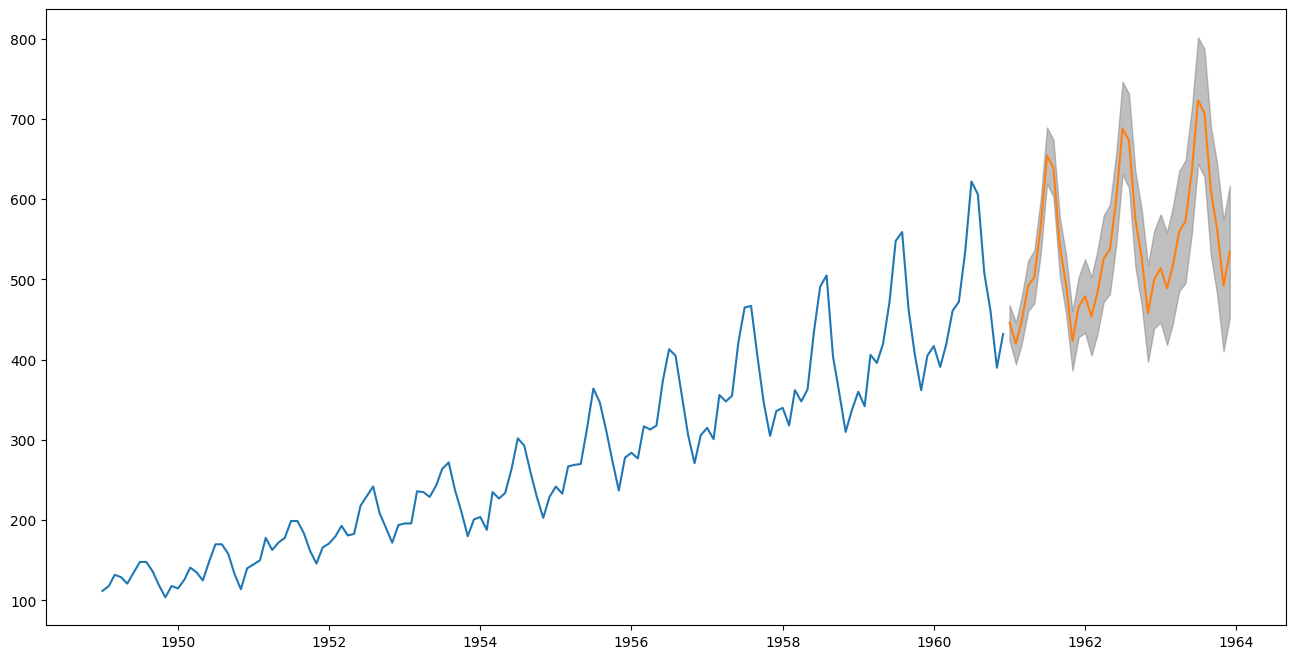

In [31]:
plt.figure(figsize=(16,8))
plt.plot(df['nPass'], label='Orignal')
plt.plot(forecast, label='forecast')
plt.fill_between(forecast.index, lower, upper, alpha=0.5, color='gray', label='confidence interval')
plt.show()

### Save forecasted data into dataframe

In [32]:
df_pred = forecast.to_frame()
df_pred

,0
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [33]:
df_pred.columns = ['Forecast']

In [34]:
df_pred

,Forecast
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [35]:
df_pred['lower'] = lower
df_pred['upper'] = upper

In [36]:
df_pred

,Forecast,lower,upper
1961-01-01,446,423.344883,467.924932
1961-02-01,420,394.235649,446.554235
1961-03-01,449,419.832108,478.564342
1961-04-01,492,460.376798,523.302815
1961-05-01,503,470.381114,536.407467
1961-06-01,567,532.700088,601.024348
1961-07-01,654,619.221992,689.297805
1961-08-01,639,602.880776,674.313558
1961-09-01,541,504.632223,577.134537
1961-10-01,494,457.446916,530.805526


In [37]:
df_pred['lower'] = df_pred['lower'].apply(round)
df_pred['upper'] = df_pred['upper'].apply(round)

In [38]:
df_pred

,Forecast,lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


### Save predictions to csv

In [39]:
df_pred.to_csv('Predictions.csv')